### Simulation/Generation of Biomarkers

In [1]:
from biomarker_simulation import BiomarkerSimulation
from biomarker_utils import generate_transition_matrix, initialize_biomarkers
from mcmc_analysis import MCMCAnalysis
import numpy as np
import matplotlib.pyplot as plt

# specify common parameters for biomarker stages
n_patients_stage = {
    1: 200, 2: 250, 3: 200, 4: 70, 5: 80,
    6: 60, 7: 50, 8: 40, 9: 40, 10: 30,
}

Sigmoidal Model:
X shape: (2040, 11)
Y shape: (2040,)


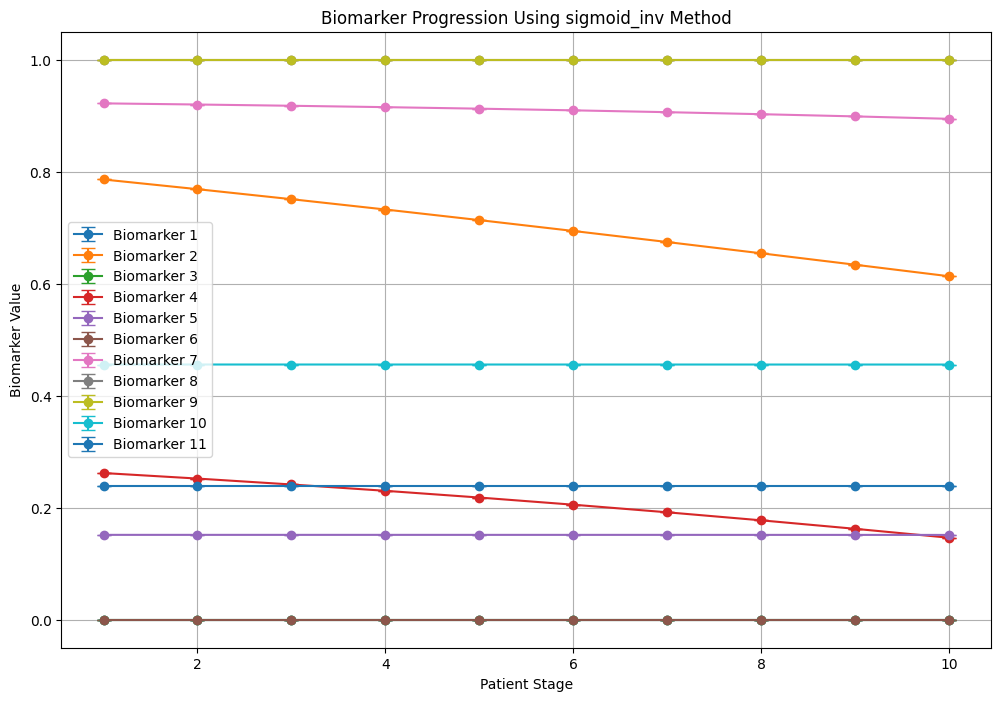

In [11]:
# sigmoid parameters
n_patients_stage_expanded = {
    1: 400, 2: 500, 3: 400, 4: 140, 5: 160,
    6: 120, 7: 100, 8: 80, 9: 80, 10: 60}
    # 11: 40, 12: 30, 13: 25, 14: 20, 15: 20,
    # 16: 15, 17: 10, 18: 5, 19: 5, 20: 5
#}

biomarkers_params_sigmoid = {
    0: {'s': 6, 'c': 3},
    1: {'s': 12, 'c': 12},
    2: {'s': 17, 'c': 10},
    3: {'s': 23, 'c': 11},
    4: {'s': 28, 'c': 2},
    5: {'s': 34, 'c': 12},
    6: {'s': 40, 'c': 10},
    7: {'s': 45, 'c': 8},
    8: {'s': 51, 'c': 6},
    9: {'s': 57, 'c': 5},
    10: {'s': 62, 'c': 2}
    # 11: {'s': 67, 'c': 3},
    # 12: {'s': 72, 'c': 2},
    # 13: {'s': 77, 'c': 3},
    # 14: {'s': 82, 'c': 4},
    # 15: {'s': 87, 'c': 3},
    # 16: {'s': 92, 'c': 2},
    # 17: {'s': 97, 'c': 2},
    # 18: {'s': 102, 'c': 3},
    # 19: {'s': 107, 'c': 3}
}
# Instantiate and simulate using the sigmoid model
simulator = BiomarkerSimulation(n_patients_stage_expanded, biomarkers_params_sigmoid, 'sigmoid_inv', add_noise=True, noise_std=0.95, random_state=2020)
X, y, stages = simulator.simulate()
print("Sigmoidal Model:")
print("X shape:", X.shape)
print("Y shape:", y.shape)

# Plotting the results
simulator.plot_biomarkers()


In [3]:
# running mcmc on sigmoid model
mcmc_analysis_sigmoid = MCMCAnalysis(X, y)
first_ten_orders_sigmoid, rho_sigmoid, loglike_sigmoid, update_iters_sigmoid, probas_sigmoid = mcmc_analysis_sigmoid.perform_analysis()

print("First 10 MCMC sampled orders (Sigmoid):", first_ten_orders_sigmoid)
print("Spearman's rho between initial and first MCMC order (Sigmoid):", rho_sigmoid)

C:\Users\semch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_distn_infrastructure.py:2069: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\semch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_distn_infrastructure.py:2069: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
100%|██████████| 500000/500000 [01:20<00:00, 6188.63it/s]


TypeError: cannot unpack non-iterable NoneType object

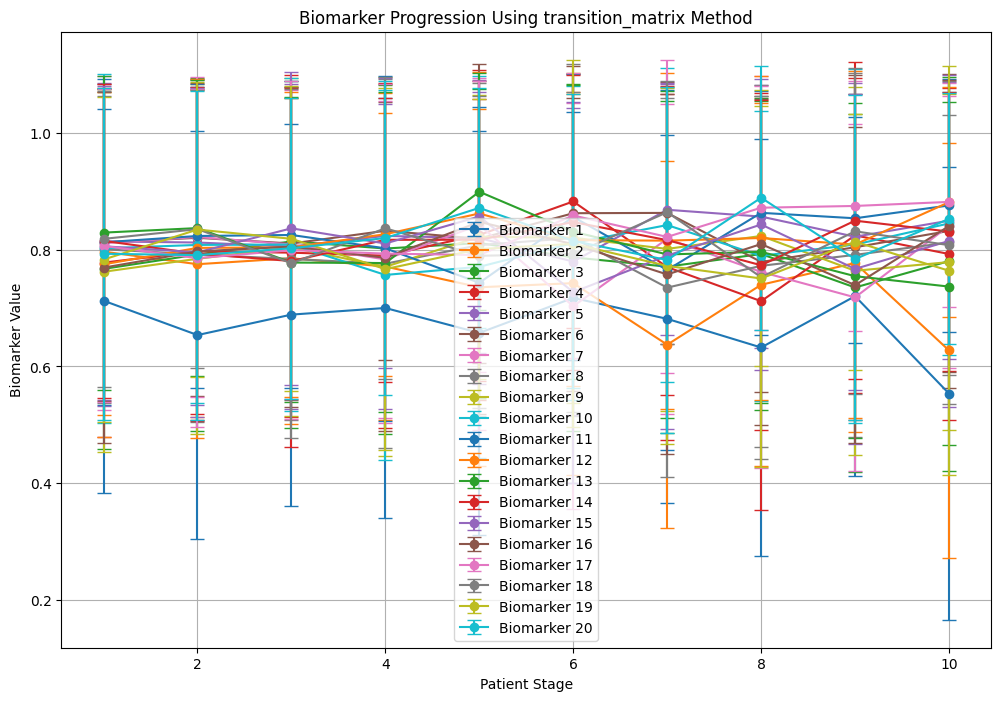

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Transition Matrix Model:
X shape: (1020, 20)
Y shape: (1020,)


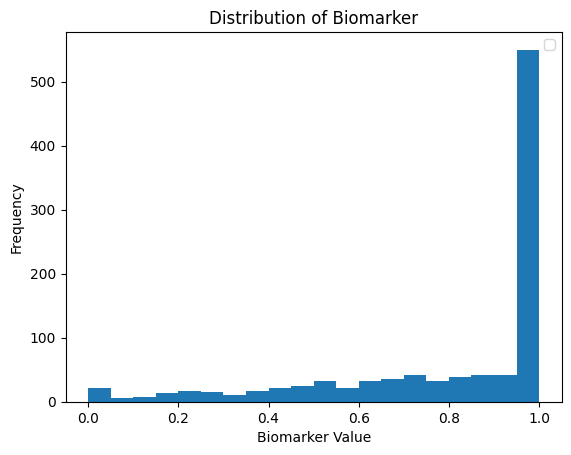

In [9]:
num_biomarkers = 20
A = generate_transition_matrix(size=num_biomarkers, coeff=1e-1)
y_init = initialize_biomarkers(num_biomarkers, init_value=0.9)

biomarkers_params = {
    'transition_matrix': A,
    'y_init': y_init
}

simulator_mat = BiomarkerSimulation(n_patients_stage, biomarkers_params, 'transition_matrix', add_noise=True, noise_std=0.5)
simulator_mat.simulate()
simulator_mat.plot_biomarkers()

X_mat, y_mat, stages_mat = simulator.simulate()
print("Transition Matrix Model:")
print("X shape:", X_mat.shape)
print("Y shape:", y_mat.shape)

# debug plot
plt.hist(X_mat[:, 10], bins=20)
plt.xlabel('Biomarker Value')
plt.ylabel('Frequency')
plt.title('Distribution of Biomarker')
plt.legend()
plt.show()

#### MCMC analysis of Transition Matrix based biomarkers

In [10]:
# Assuming X_transition and y_transition are from the transition matrix model
mcmc_analysis_transition = MCMCAnalysis(X_mat, y_mat)
first_ten_orders_transition, rho_transition, loglike_transition, update_iters_transition, probas_transition = mcmc_analysis_transition.perform_analysis()

print("First 10 MCMC sampled orders (Transition Matrix):\n", first_ten_orders_transition)
print("Spearman's rho between initial and first MCMC order (Transition Matrix):", rho_transition)


100%|██████████| 500000/500000 [02:00<00:00, 4157.30it/s]

First 10 MCMC sampled orders (Transition Matrix):
 [array([ 1, 13,  0,  9, 15, 17,  3, 12, 19, 18,  2, 11,  6, 10,  4, 16,  8,
        7, 14,  5]), array([ 1, 13,  0,  9, 15, 17,  3, 12, 19, 18,  2, 11,  6, 10, 14, 16,  8,
        7,  4,  5]), array([ 1, 13,  0,  9, 15, 17,  3, 19, 12, 18,  2, 11,  6, 10, 14, 16,  8,
        7,  4,  5]), array([ 1, 13,  0,  9, 15, 17,  3, 19, 12, 18,  2, 11,  6, 10, 14, 16,  5,
        7,  4,  8]), array([ 1, 13,  0,  9, 15, 17,  3, 19, 12, 18,  6, 11,  2, 10, 14, 16,  5,
        7,  4,  8]), array([ 1, 13,  0,  9, 15, 17,  3, 12, 19, 18,  6, 11,  2, 10, 14, 16,  5,
        7,  4,  8]), array([ 1, 13,  0,  9, 15, 17,  3, 12, 19, 18,  6, 11,  2, 10, 14, 16,  7,
        5,  4,  8]), array([ 1, 13,  0,  9, 15, 17,  3, 12, 19, 18, 11,  6,  2, 10, 14, 16,  7,
        5,  4,  8]), array([ 1, 13,  0,  9, 15, 17,  3, 19, 12, 18, 11,  6,  2, 10, 14, 16,  7,
        5,  4,  8]), array([ 1, 13,  0,  9, 15, 17,  3, 19, 12, 18, 10,  6,  2, 11, 14, 16,  7,
        5

## ODE based

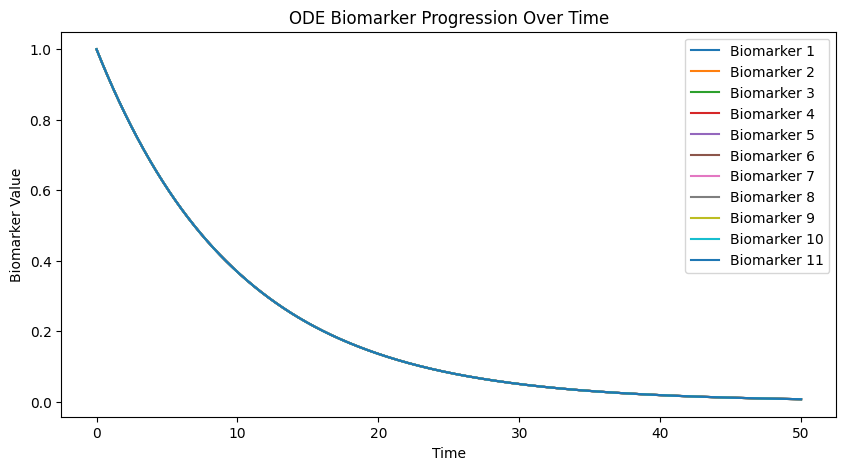

ODE Model:
X shape: (1000, 11)


AttributeError: 'NoneType' object has no attribute 'shape'

In [2]:
n_patients_stage = {}  # not used for ODE but needed for class instantiation
biomarkers_params_ode = {
    'y_init': np.array([1.0] * 11),  # initial conditions for each biomarker
    't_span': (0, 50),
    'n_steps': 1000
}

simulator_ode = BiomarkerSimulation(n_patients_stage, biomarkers_params_ode, 'ode')
X_ode, y_ode, stages = simulator_ode.simulate()
simulator_ode.plot_biomarkers()

print("ODE Model:")
print("X shape:", X_ode.shape)
print("Y shape:", y_ode.shape)

# plotting single biomarker progression
plt.figure(figsize=(10, 5))
plt.plot(simulator_ode.t, X_ode[:, 3], label='Biomarker 3 Progression') #idx
plt.title("ODE Biomarker Progression Over Time")
plt.xlabel('Time')
plt.ylabel('Biomarker Value')
plt.legend()
plt.show()

#### MCMC analysis of ODE based biomarkers

In [3]:
# Assuming X_ode and y_ode are from the ODE model
mcmc_analysis_ode = MCMCAnalysis(X_ode, y_ode)
first_ten_orders_ode, rho_ode, loglike_ode, update_iters_ode, probas_ode = mcmc_analysis_ode.perform_analysis()

print("First 10 MCMC sampled orders (ODE):", first_ten_orders_ode)
print("Spearman's rho between initial and first MCMC order (ODE):", rho_ode)

NameError: name 'X_ode' is not defined